# jajajaj

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from smoothing_methods import plot_lc, plot_subset, smooth_lc, shift_phase

### funcion plot

In [27]:
DATA_DIR = 'NGC_6426V/processed'
data_file = f'{DATA_DIR}/lc78_processed.data'

#NGC_6426V/processed/lc57_processed.data

In [28]:
lc_data = pd.read_csv(data_file, index_col ="file", delim_whitespace=True)

lc_data

/tmp/ipykernel_11996/1537906715.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc_data = pd.read_csv(data_file, index_col ="file", delim_whitespace=True)


,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER
file,,,,,,,,
202505060414o.fit,401.830477,699.0739,21.162405,0.5716,401.826493,07:49:04,130.0,V
202505060416o.fit,401.833938,647.1567,21.175128,0.5587,401.829954,07:54:03,130.0,V
202505060419o.fit,401.840153,567.6502,21.548229,0.5420,401.836169,08:02:35,180.0,V
202505060421o.fit,401.844170,555.8042,21.551207,0.5615,401.840185,08:08:22,180.0,V
202505060423o.fit,401.848175,750.0744,21.503373,0.6462,401.844190,08:14:08,180.0,V
...,...,...,...,...,...,...,...,...
202505161431o.fit,411.976220,-2121.8488,22.604088,0.9185,411.971713,11:17:46,180.0,V
202505161433o.fit,411.980224,-2576.7373,22.957960,0.9325,411.975718,11:23:32,180.0,V
202505161435o.fit,411.984229,-2536.6323,22.921689,0.9079,411.979722,11:29:18,180.0,V


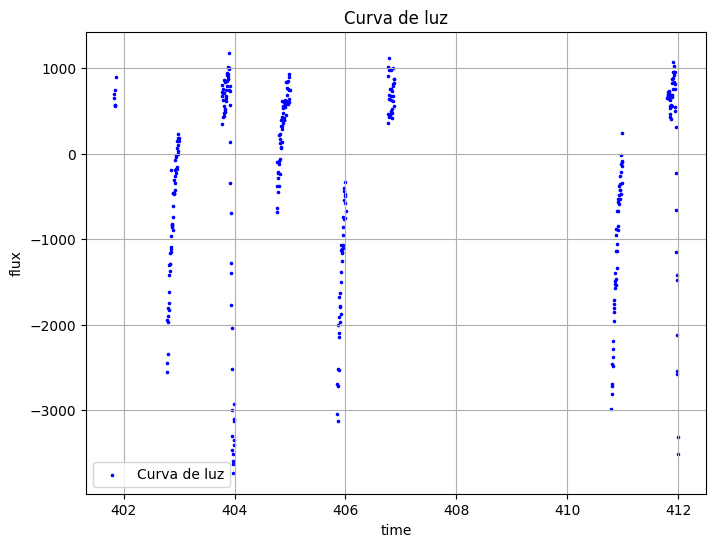

In [29]:
plot_lc(lc_data['HJD'], lc_data['Flux'])

# exploramos calSNR

In [5]:
print(lc_data["calSNR"].describe())

count    344.000000
mean       0.561362
std        0.248494
min        0.022400
25%        0.382425
50%        0.569350
75%        0.760625
max        0.991200
Name: calSNR, dtype: float64


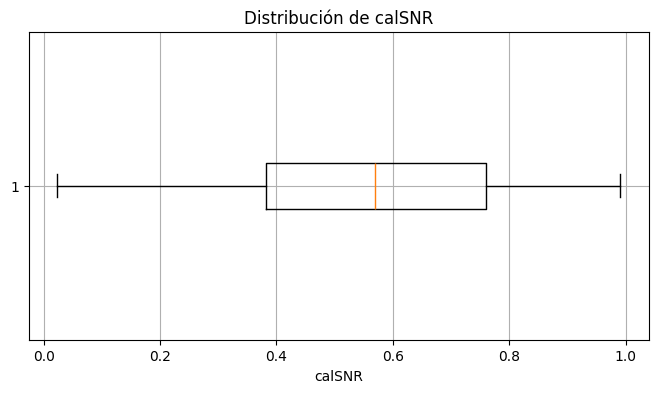

In [6]:
plt.figure(figsize=(8, 4))
plt.boxplot(lc_data["calSNR"], vert=False)
plt.title("Distribución de calSNR")
plt.xlabel("calSNR")
plt.grid(True)
plt.show()

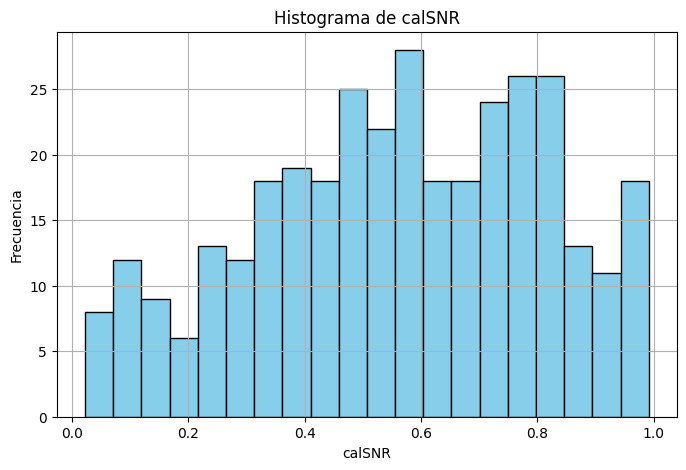

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(lc_data["calSNR"], bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma de calSNR")
plt.xlabel("calSNR")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [8]:
float(lc_data[lc_data["calSNR"] > 0.3].count()[0] / lc_data["calSNR"].count()) * 100

/tmp/ipykernel_11996/434897737.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  float(lc_data[lc_data["calSNR"] > 0.3].count()[0] / lc_data["calSNR"].count()) * 100


83.13953488372093

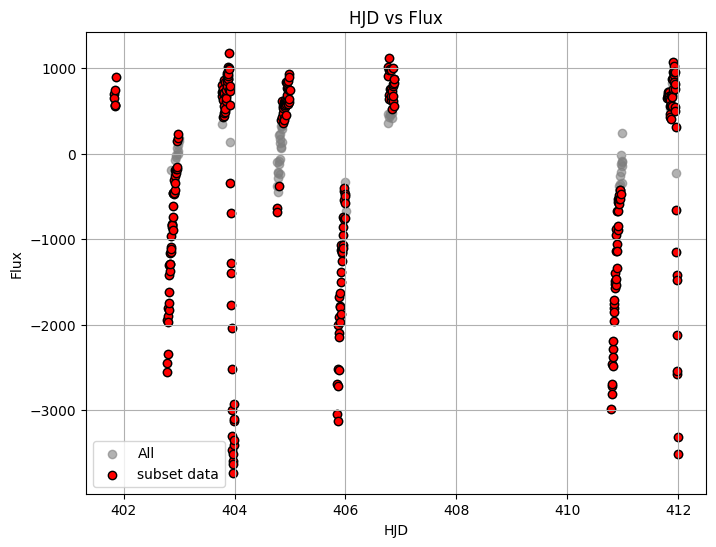

In [9]:
# Puntos con calSNR < 0.3
subset = lc_data[lc_data["calSNR"] > 0.3]

plot_subset("HJD", "Flux", lc_data, subset)

# En fase

In [10]:
lc_data_phased = lc_data.copy(deep=True)

In [11]:
# en fase 
phase = 0.407047
shift = 0
#shift = -0.42

lc_data['Phased'] = (lc_data["HJD"]+shift) % phase

lc_data

,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER,Phased
file,,,,,,,,,
202505060414o.fit,401.830477,699.0739,21.162405,0.5716,401.826493,07:49:04,130.0,V,0.075088
202505060416o.fit,401.833938,647.1567,21.175128,0.5587,401.829954,07:54:03,130.0,V,0.078549
202505060419o.fit,401.840153,567.6502,21.548229,0.5420,401.836169,08:02:35,180.0,V,0.084764
202505060421o.fit,401.844170,555.8042,21.551207,0.5615,401.840185,08:08:22,180.0,V,0.088781
202505060423o.fit,401.848175,750.0744,21.503373,0.6462,401.844190,08:14:08,180.0,V,0.092786
...,...,...,...,...,...,...,...,...,...
202505161431o.fit,411.976220,-2121.8488,22.604088,0.9185,411.971713,11:17:46,180.0,V,0.044656
202505161433o.fit,411.980224,-2576.7373,22.957960,0.9325,411.975718,11:23:32,180.0,V,0.048660
202505161435o.fit,411.984229,-2536.6323,22.921689,0.9079,411.979722,11:29:18,180.0,V,0.052665


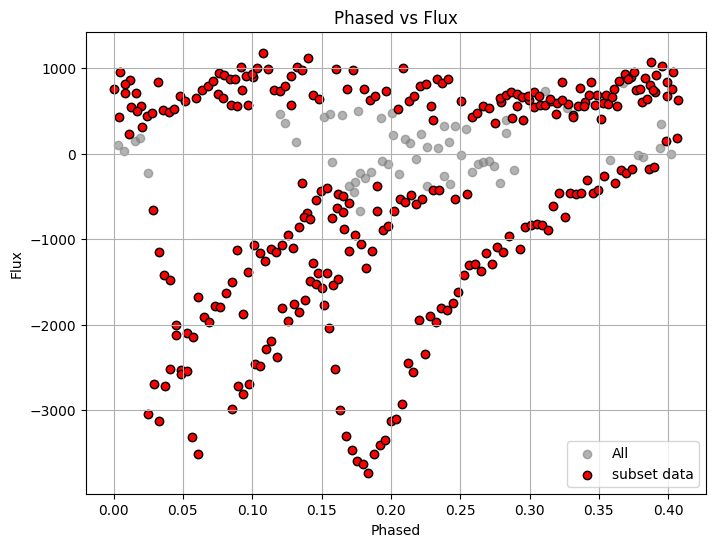

In [12]:
subset = lc_data[lc_data["calSNR"] > 0.3]
plot_subset("Phased", "Flux", lc_data, subset)

## Fase con python

In [13]:
from astropy.timeseries import LombScargle
import numpy as np

# Usamos los valores de tiempo y flujo
time = lc_data['HJD'].values
flux = lc_data['Flux'].values

# Calculamos el periodograma
frequency, power = LombScargle(time, flux).autopower()

# Obtenemos el periodo con la potencia más alta
best_period = 1 / frequency[np.argmax(power)]
print(f"🌀 Mejor periodo estimado: {best_period:.6f} días")

🌀 Mejor periodo estimado: 0.615867 días


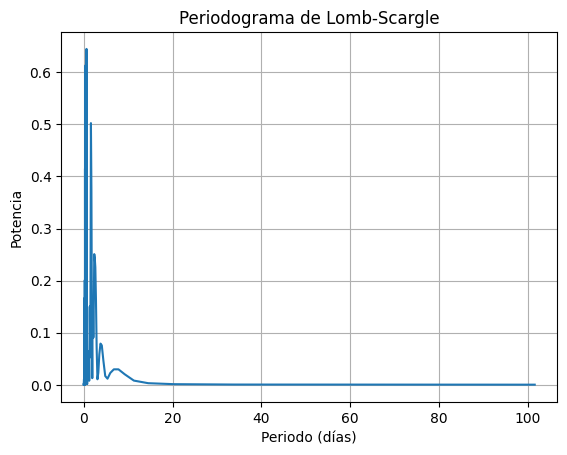

In [14]:
plt.plot(1 / frequency, power)
plt.xlabel("Periodo (días)")
plt.ylabel("Potencia")
plt.title("Periodograma de Lomb-Scargle")
plt.grid(True)
plt.show()

In [15]:
# mi periodo 
#best_period = 0.406575250

In [16]:
# Guardamos la fase en una nueva columna
lc_data['Phased'] = (lc_data['HJD'] % best_period)

In [17]:
lc_data = shift_phase(lc_data, 0.3)

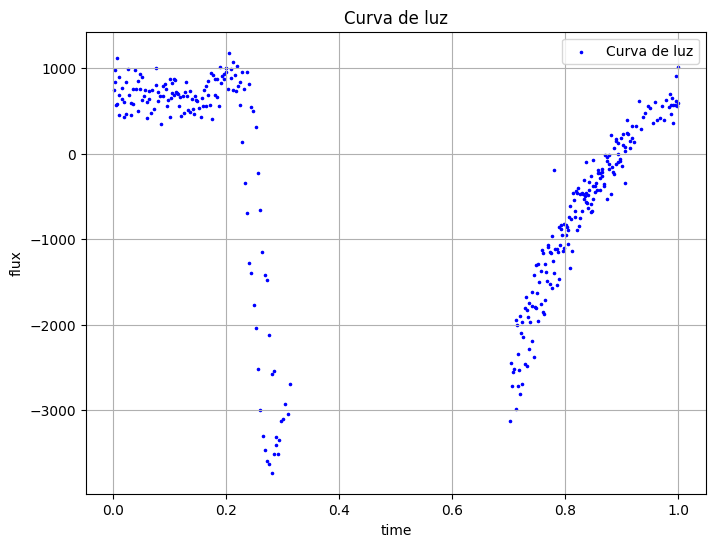

In [18]:
plot_lc(lc_data['Phased'], lc_data['Flux'])

## smoothing curves

In [19]:
#lc_clean = smooth_lc(lc_data, 500)

In [20]:
#lc_clean = smooth_lc(lc_clean, 400)

In [21]:
# sort by phase
lc_sorted = lc_data.sort_values(by='Phased')
lc_sorted

,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER,Phased
file,,,,,,,,,
202505060423o.fit,401.848175,750.0744,21.503373,0.6462,401.844190,08:14:08,180.0,V,0.002792
202505090840o.fit,404.928254,834.5775,21.355325,0.6268,404.924097,10:09:22,160.0,V,0.003535
202505111055o.fit,406.775909,982.7698,21.320839,0.4672,406.771655,06:29:51,160.0,V,0.003589
202505060425o.fit,401.852179,567.1577,21.548353,0.6147,401.848194,08:19:54,180.0,V,0.006796
202505090842o.fit,404.932293,578.1008,21.417727,0.4881,404.928137,10:15:11,160.0,V,0.007574
...,...,...,...,...,...,...,...,...,...
202505090836o.fit,404.920175,614.0695,21.408757,0.4337,404.916019,09:57:44,160.0,V,0.995456
202505111051o.fit,406.767842,909.1085,21.337843,0.4064,406.763588,06:18:14,160.0,V,0.995522
202505060421o.fit,401.844170,555.8042,21.551207,0.5615,401.840185,08:08:22,180.0,V,0.998787


### rolling function
- **`min_period`** Minimum number of observations in window required to have a value; otherwise, result is `np.nan`.

In [22]:
# smooth by median
smooth_flux = lc_sorted['Flux'].rolling(window=25, min_periods=1, center=True).median()
np.array(smooth_flux)

array([ 6.8958570e+02,  6.6353870e+02,  6.8958570e+02,  7.1983005e+02,
        6.8974720e+02,  6.8966645e+02,  6.8958570e+02,  6.8966645e+02,
        6.8958570e+02,  6.8966645e+02,  6.8974720e+02,  6.8966645e+02,
        6.8974720e+02,  6.8974720e+02,  6.8974720e+02,  6.8958570e+02,
        6.8974720e+02,  6.8974720e+02,  6.8974720e+02,  6.8958570e+02,
        6.8958570e+02,  6.8974720e+02,  6.8974720e+02,  6.7844450e+02,
        6.8974720e+02,  6.8974720e+02,  7.3503860e+02,  7.3503860e+02,
        6.8974720e+02,  7.2625490e+02,  7.2625490e+02,  7.2625490e+02,
        7.2625490e+02,  7.2625490e+02,  7.2625490e+02,  7.2625490e+02,
        7.2625490e+02,  6.7844450e+02,  6.7844450e+02,  6.7649670e+02,
        6.7649670e+02,  6.7649670e+02,  6.7649670e+02,  6.7649670e+02,
        6.8813540e+02,  7.0925300e+02,  7.0925300e+02,  7.0925300e+02,
        7.0925300e+02,  7.0445110e+02,  7.0445110e+02,  6.9604430e+02,
        6.8813540e+02,  6.8813540e+02,  6.8813540e+02,  6.9604430e+02,
      

In [23]:
# compute residuals
residuals = lc_sorted['Flux'] - smooth_flux
np.array(residuals)

array([ 6.0488700e+01,  1.7103880e+02,  2.9318410e+02, -1.5267235e+02,
       -1.1164640e+02,  4.2686225e+02,  2.1176750e+02, -2.3465135e+02,
        0.0000000e+00, -5.2174750e+01,  8.3129700e+01, -2.6389935e+02,
       -8.3007500e+01, -2.2616600e+02,  1.5181870e+02,  2.9995370e+02,
        0.0000000e+00, -2.3428800e+02, -9.2778600e+01,  6.8087500e+01,
       -1.0807270e+02,  2.9151120e+02,  6.5408400e+01, -1.7605620e+02,
        1.5879460e+02,  7.0829000e+01,  1.9139650e+02, -1.1064450e+02,
        2.0414150e+02, -4.7810400e+01,  1.5783200e+01, -3.0731900e+02,
       -1.1921800e+02,  8.7837000e+00, -8.3923900e+01, -2.5436140e+02,
        1.4725600e+01, -1.5195470e+02,  3.2197840e+02,  1.3161180e+02,
       -6.4652200e+01,  4.9758200e+01,  0.0000000e+00, -3.2362430e+02,
        9.8747000e+01, -3.8440100e+01,  1.0687620e+02,  5.3178200e+01,
       -1.5209020e+02, -7.9426900e+01,  1.6963550e+02, -2.6966290e+02,
       -3.5117600e+01,  1.4416530e+02,  2.1117600e+01, -7.9089000e+00,
      

In [24]:
# delete outliers by distance
mask = residuals.abs() < 400
lc_clean = lc_sorted[mask]

lc_clean

,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER,Phased
file,,,,,,,,,
202505060423o.fit,401.848175,750.0744,21.503373,0.6462,401.844190,08:14:08,180.0,V,0.002792
202505090840o.fit,404.928254,834.5775,21.355325,0.6268,404.924097,10:09:22,160.0,V,0.003535
202505111055o.fit,406.775909,982.7698,21.320839,0.4672,406.771655,06:29:51,160.0,V,0.003589
202505060425o.fit,401.852179,567.1577,21.548353,0.6147,401.848194,08:19:54,180.0,V,0.006796
202505090842o.fit,404.932293,578.1008,21.417727,0.4881,404.928137,10:15:11,160.0,V,0.007574
...,...,...,...,...,...,...,...,...,...
202505060419o.fit,401.840153,567.6502,21.548229,0.5420,401.836169,08:02:35,180.0,V,0.994770
202505090836o.fit,404.920175,614.0695,21.408757,0.4337,404.916019,09:57:44,160.0,V,0.995456
202505111051o.fit,406.767842,909.1085,21.337843,0.4064,406.763588,06:18:14,160.0,V,0.995522


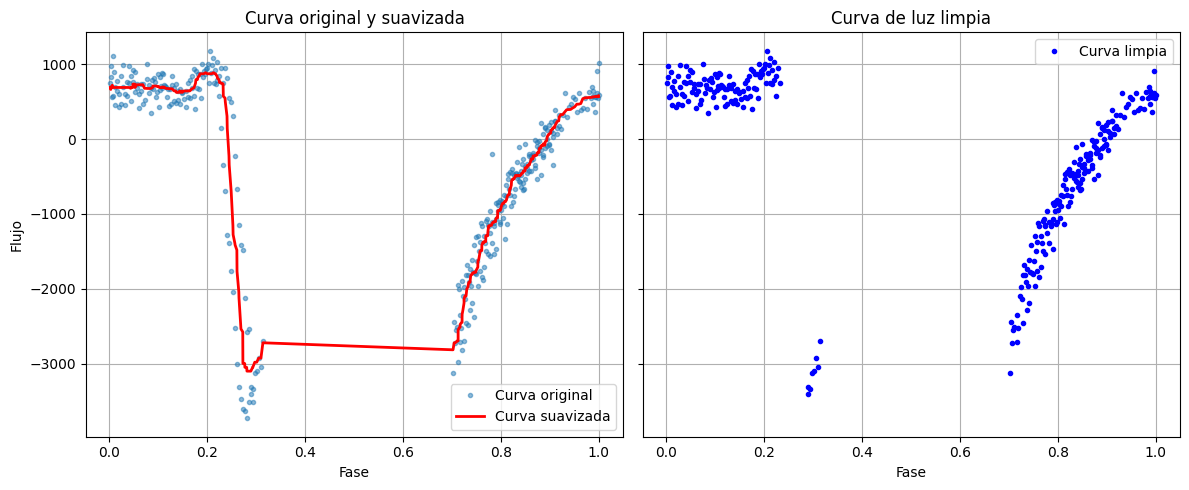

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot 1: original + smoothed
axs[0].plot(lc_sorted['Phased'], lc_sorted['Flux'], '.', label='Curva original', alpha=0.5)
axs[0].plot(lc_sorted['Phased'], smooth_flux, '-', color='red', linewidth=2, label='Curva suavizada')
axs[0].set_title('Curva original y suavizada')
axs[0].set_xlabel('Fase')
axs[0].set_ylabel('Flujo')
axs[0].legend()
axs[0].grid(True)

# Gráfico 2: Curva limpia
axs[1].plot(lc_clean['Phased'], lc_clean['Flux'], '.', label='Curva limpia', color='blue')
axs[1].set_title('Curva de luz limpia')
axs[1].set_xlabel('Fase')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()